In [1]:
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-23. For overview type 'help("mgcv-package")'.


In [2]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_clean.csv', DATA))
head(data)

lon,lat,etopo1,beetleAcres,host,forest,mStdAge,density,PctLarge,PctOld,⋯,JanMin,TOctSep,Jan20,PcumOctSep,logSprsCPA.p1,SprsFires,PctSprs,SprsAcre,SprsDays,OutDays
-123.9778,41.15724,462.4003,0.46000,1,1,24.51245,51675.95,0.2191781,0.06666667,⋯,-1.310873,10.921748,0,2914.449,8.112028,7,0.8750000,8.257143,3.0,6.0
-123.6292,39.83341,636.2545,0.70000,1,1,78.60288,47511.05,0.3593750,0.50000000,⋯,-2.068149,10.979370,0,2751.259,9.361249,1,1.0000000,3597.000000,34.0,72.0
-123.7100,41.00384,758.2146,0.92000,1,1,56.26146,51141.66,0.4605263,0.71428571,⋯,-2.187790,11.975916,0,2702.836,8.456540,8,0.6666667,0.112500,0.0,0.5
-123.7726,41.36003,924.6661,15.23333,1,1,189.66301,52250.75,0.3257576,0.20833333,⋯,-3.029533,8.998663,0,2946.935,9.933758,2,0.3333333,0.300000,1.0,0.5
-123.6073,41.10505,766.6403,0.70000,1,1,78.18508,50122.04,0.3162281,0.20000000,⋯,-3.342976,8.919163,0,2822.343,8.805613,8,0.8000000,606.425000,0.5,1.0
-123.6228,41.19412,729.4384,9.30000,1,1,109.59647,51100.97,0.3793103,0.11111111,⋯,-2.963782,10.673803,0,2762.928,8.071219,9,0.6923077,11.266667,1.0,4.0


In [3]:
names(data)

[1] "lon"           "lat"           "etopo1"        "beetleAcres"  
 [5] "host"          "forest"        "mStdAge"       "density"      
 [9] "PctLarge"      "PctOld"        "vcc"           "mfri"         
[13] "prs"           "pms"           "pls"           "GAP1"         
[17] "GAP2"          "GAP3"          "vpd"           "cwd"          
[21] "maxAugT"       "summerP0"      "Tmean"         "mi"           
[25] "Tvar"          "wd"            "AugTmean"      "OctTmin"      
[29] "AugMaxT"       "AugTmax"       "Acs"           "MarMin"       
[33] "ddAugJun"      "ddAugJul"      "JanTmin"       "PPT"          
[37] "summerP2"      "TMarAug"       "Mar20"         "fallTmean"    
[41] "MarTmin"       "maxT"          "Tmin"          "winterMin"    
[45] "summerTmean"   "Pmean"         "summerP1"      "minT"         
[49] "JanMin"        "TOctSep"       "Jan20"         "PcumOctSep"   
[53] "logSprsCPA.p1" "SprsFires"     "PctSprs"       "SprsAcre"     
[57] "SprsDays"      "OutDays"

In [4]:
# remove 'logSprsCPA.p1' and 'SprsDays' due to small sample sizes
drops <- c('logSprsCPA.p1', 'SprsDays')
data <- data[,!(names(data) %in% drops)]

In [11]:
# remove 'host', 'forest'
drops <- c('host', 'forest')
data <- data[,!(names(data) %in% drops)]

In [14]:
# remove the smooth terms that have fewer unique covariate combinations than specified 
# maximum degrees of freedom
nonsm <- c('GAP1', 'GAP2', 'GAP3', 'vcc', 'maxAugT')
for (field in names(data)) {
  if (!(field %in% c('beetleAcres', nonsm))) {
    cat(sprintf('s(%s) + ', field))   
  }else if(field %in% nonsm){
    cat(sprintf('%s + ', field)) 
  }
}

s(lon) + s(lat) + s(etopo1) + s(mStdAge) + s(density) + s(PctLarge) + s(PctOld) + vcc + s(mfri) + s(prs) + s(pms) + s(pls) + GAP1 + GAP2 + GAP3 + s(vpd) + s(cwd) + maxAugT + s(summerP0) + s(Tmean) + s(mi) + s(Tvar) + s(wd) + s(AugTmean) + s(OctTmin) + s(AugMaxT) + s(AugTmax) + s(Acs) + s(MarMin) + s(ddAugJun) + s(ddAugJul) + s(JanTmin) + s(PPT) + s(summerP2) + s(TMarAug) + s(Mar20) + s(fallTmean) + s(MarTmin) + s(maxT) + s(Tmin) + s(winterMin) + s(summerTmean) + s(Pmean) + s(summerP1) + s(minT) + s(JanMin) + s(TOctSep) + s(Jan20) + s(PcumOctSep) + s(SprsFires) + s(PctSprs) + s(SprsAcre) + s(OutDays) + 

In [15]:
ptm <- proc.time()
mod <- gam(
    log(beetleAcres) ~ s(lon) + s(lat) + s(etopo1) + s(mStdAge) + s(density) + s(PctLarge) + 
    s(PctOld) + vcc + s(mfri) + s(prs) + s(pms) + s(pls) + GAP1 + GAP2 + GAP3 + s(vpd) + 
    s(cwd) + maxAugT + s(summerP0) + s(Tmean) + s(mi) + s(Tvar) + s(wd) + s(AugTmean) + 
    s(OctTmin) + s(AugMaxT) + s(AugTmax) + s(Acs) + s(MarMin) + s(ddAugJun) + s(ddAugJul) + 
    s(JanTmin) + s(PPT) + s(summerP2) + s(TMarAug) + s(Mar20) + s(fallTmean) + s(MarTmin) + 
    s(maxT) + s(Tmin) + s(winterMin) + s(summerTmean) + s(Pmean) + s(summerP1) + s(minT) + 
    s(JanMin) + s(TOctSep) + s(Jan20) + s(PcumOctSep) + s(SprsFires) + s(PctSprs) + 
    s(SprsAcre) + s(OutDays), data=data, select=TRUE, method="REML")
proc.time() - ptm

   user  system elapsed 
914.294  31.951 955.575 

In [16]:
summary(mod)


Family: gaussian 
Link function: identity 

Formula:
log(beetleAcres) ~ s(lon) + s(lat) + s(etopo1) + s(mStdAge) + 
    s(density) + s(PctLarge) + s(PctOld) + vcc + s(mfri) + s(prs) + 
    s(pms) + s(pls) + GAP1 + GAP2 + GAP3 + s(vpd) + s(cwd) + 
    maxAugT + s(summerP0) + s(Tmean) + s(mi) + s(Tvar) + s(wd) + 
    s(AugTmean) + s(OctTmin) + s(AugMaxT) + s(AugTmax) + s(Acs) + 
    s(MarMin) + s(ddAugJun) + s(ddAugJul) + s(JanTmin) + s(PPT) + 
    s(summerP2) + s(TMarAug) + s(Mar20) + s(fallTmean) + s(MarTmin) + 
    s(maxT) + s(Tmin) + s(winterMin) + s(summerTmean) + s(Pmean) + 
    s(summerP1) + s(minT) + s(JanMin) + s(TOctSep) + s(Jan20) + 
    s(PcumOctSep) + s(SprsFires) + s(PctSprs) + s(SprsAcre) + 
    s(OutDays)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.31113    1.71340   0.182   0.8560  
vcc         -0.01736    0.06073  -0.286   0.7750  
GAP1        -0.23981    0.18975  -1.264   0.2067  
GAP2         0.43569    0.21814   1.997 

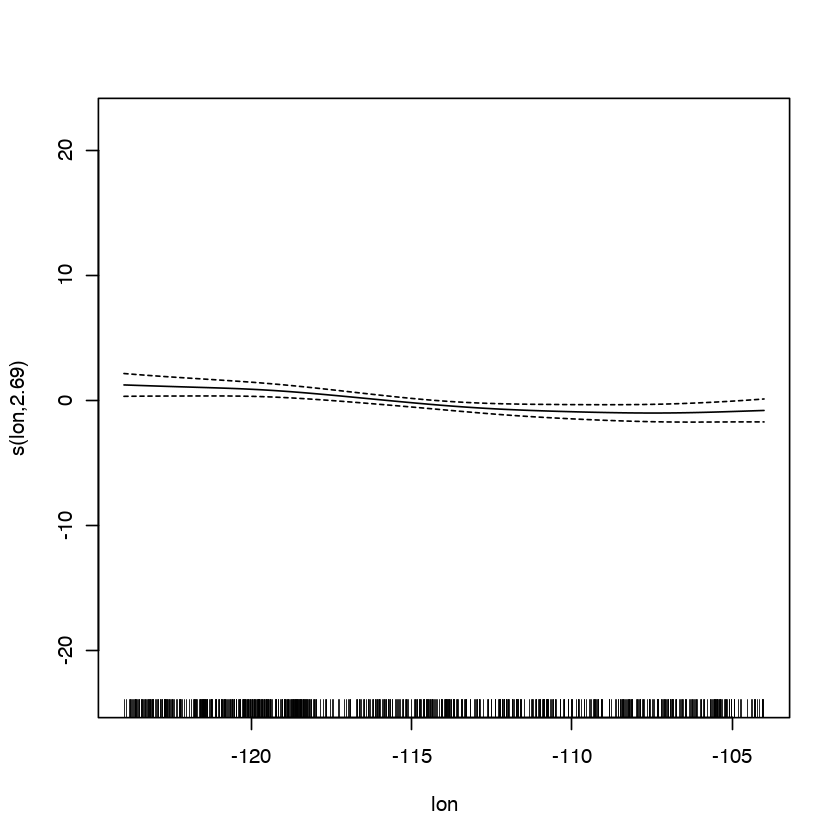

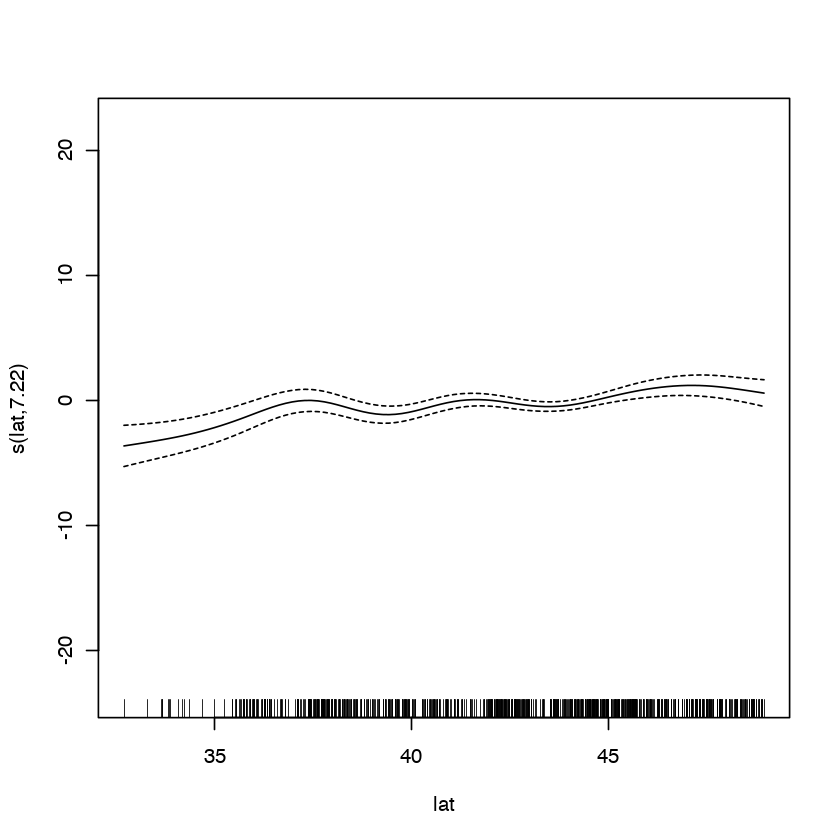

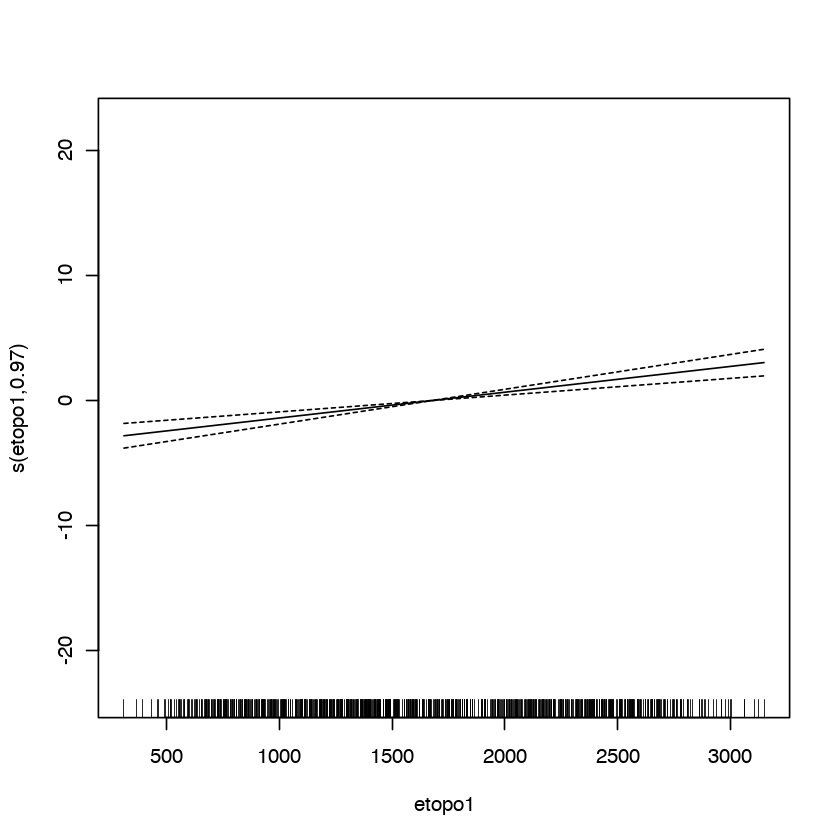

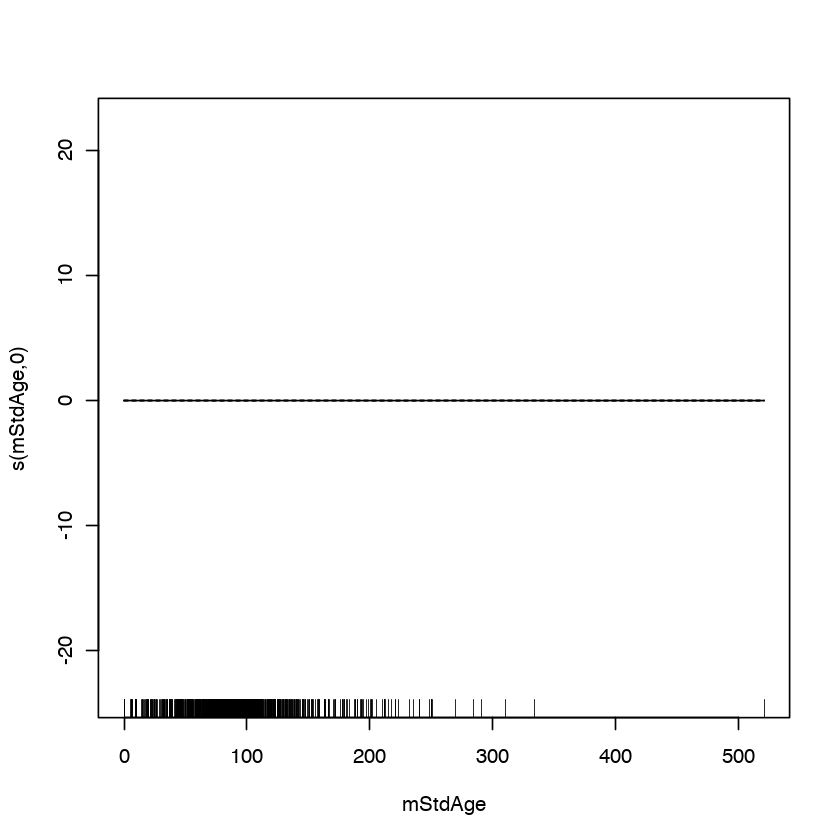

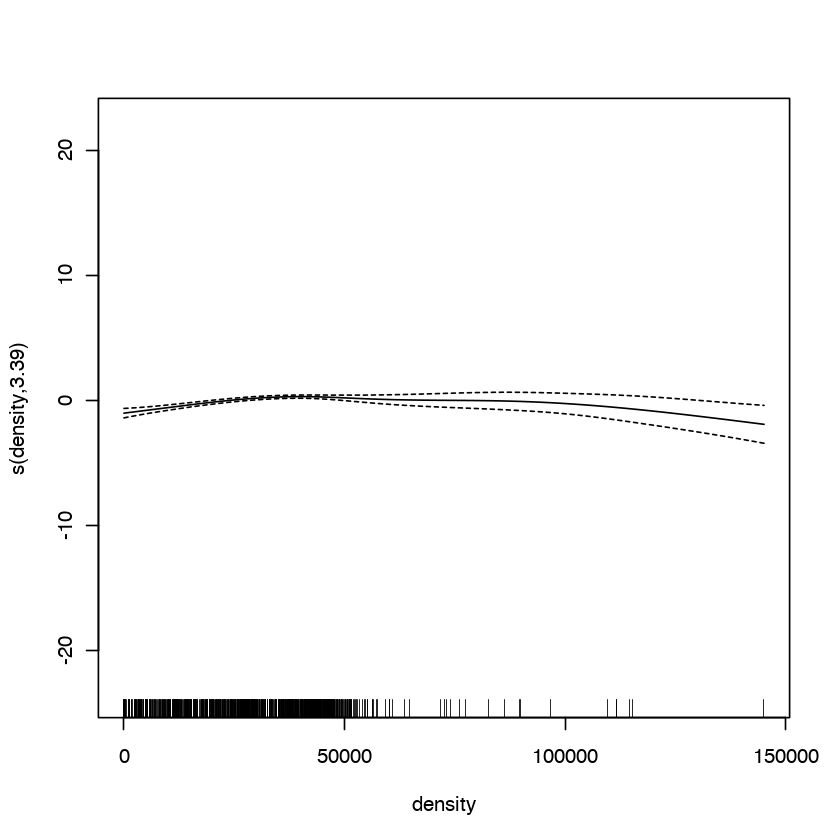

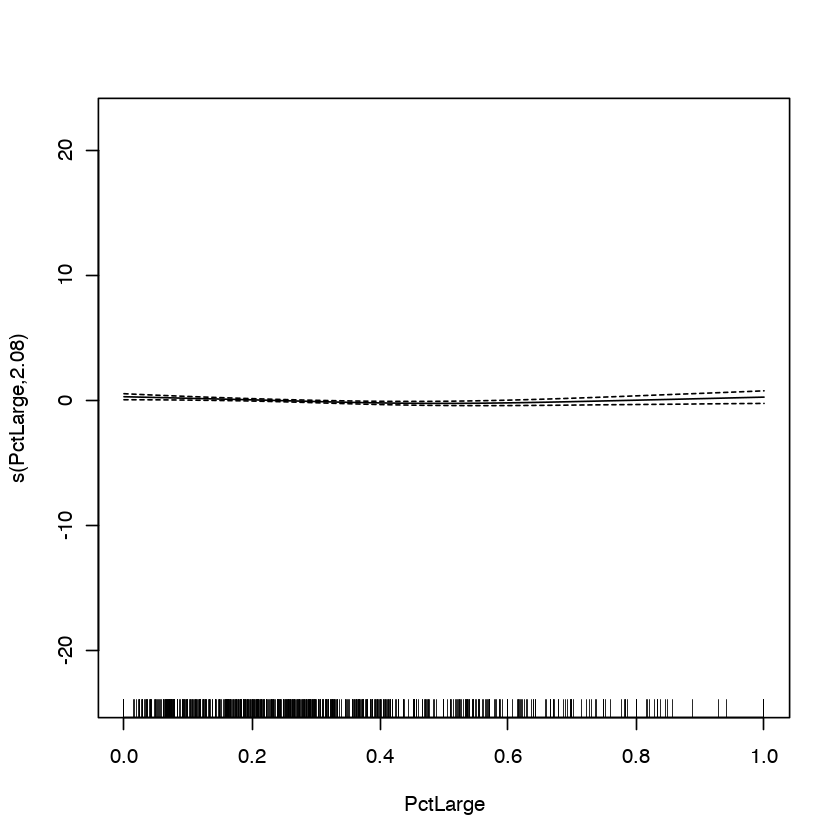

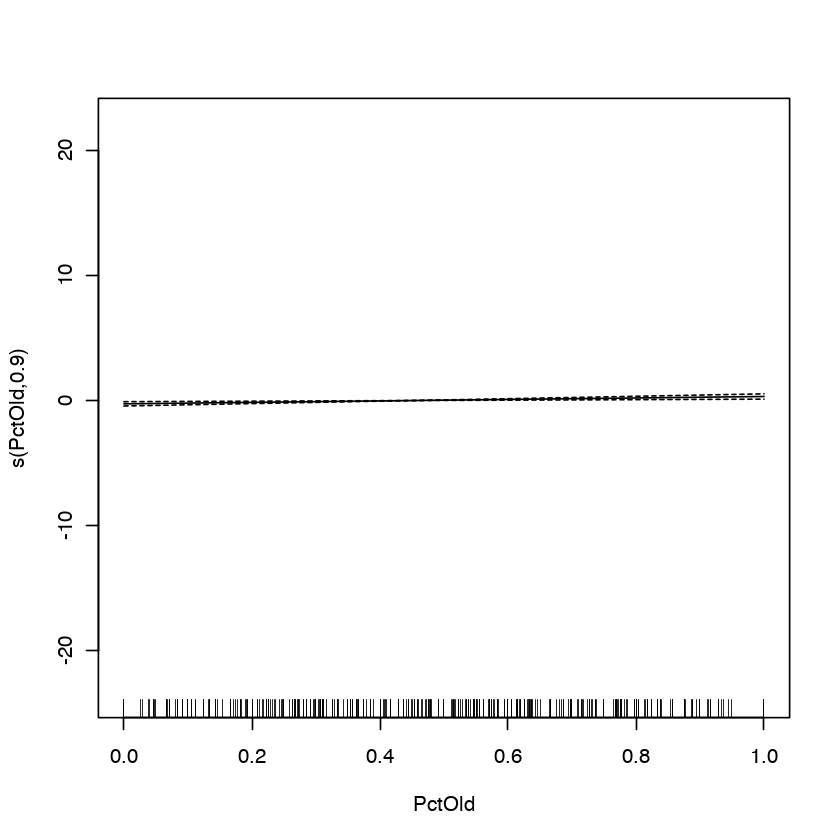

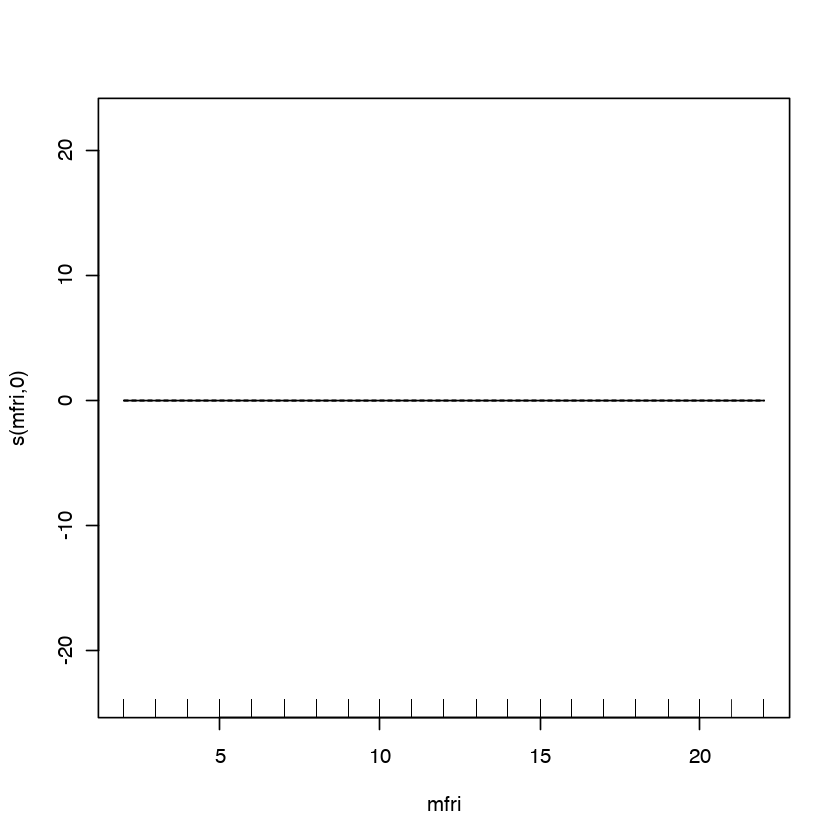

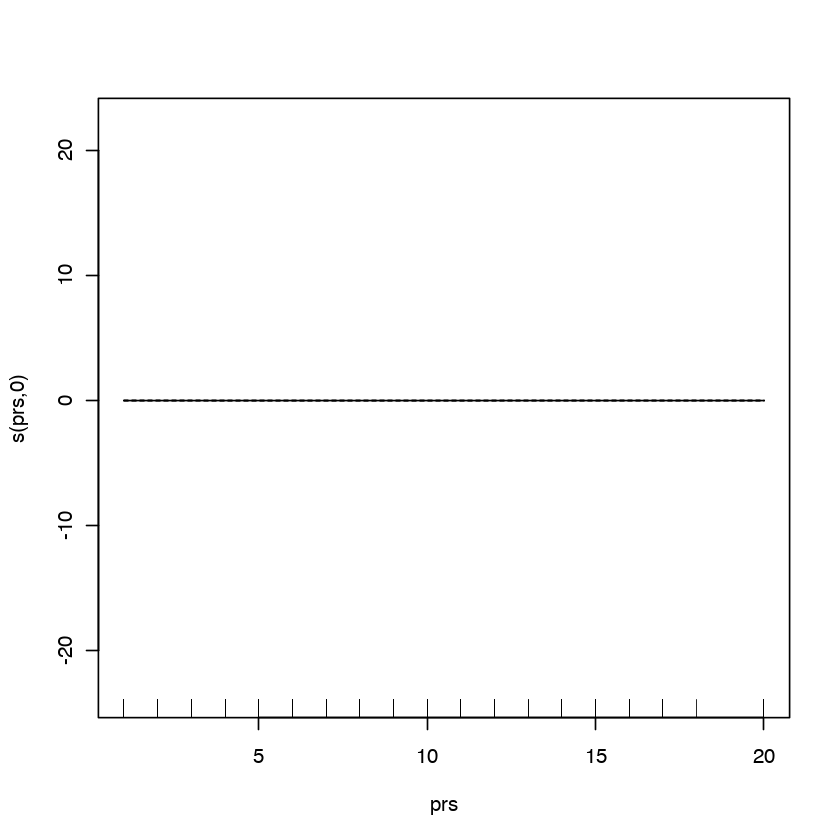

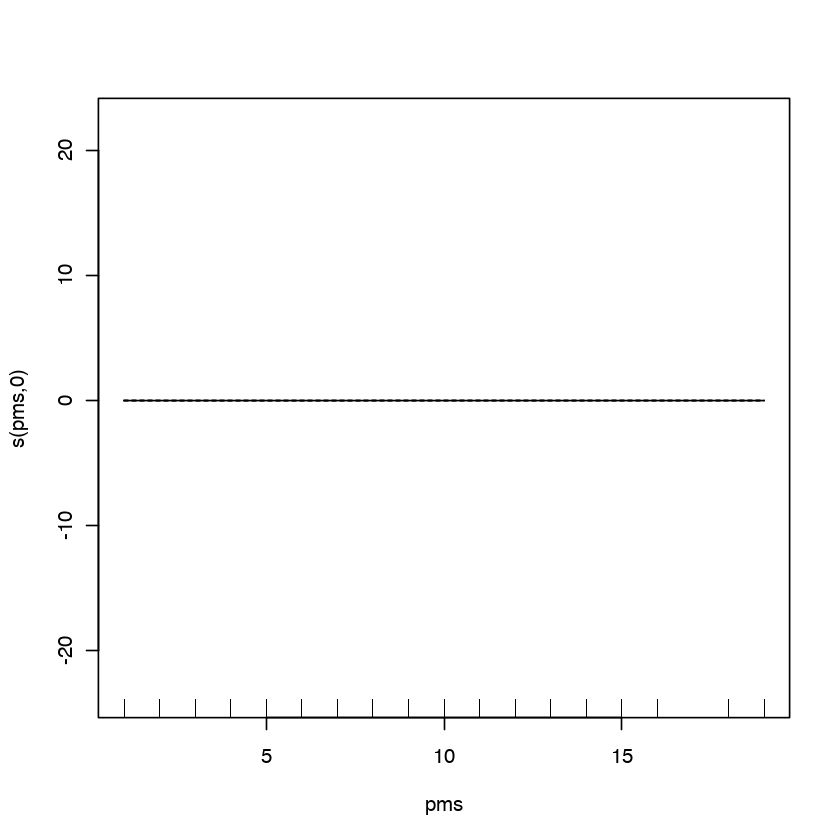

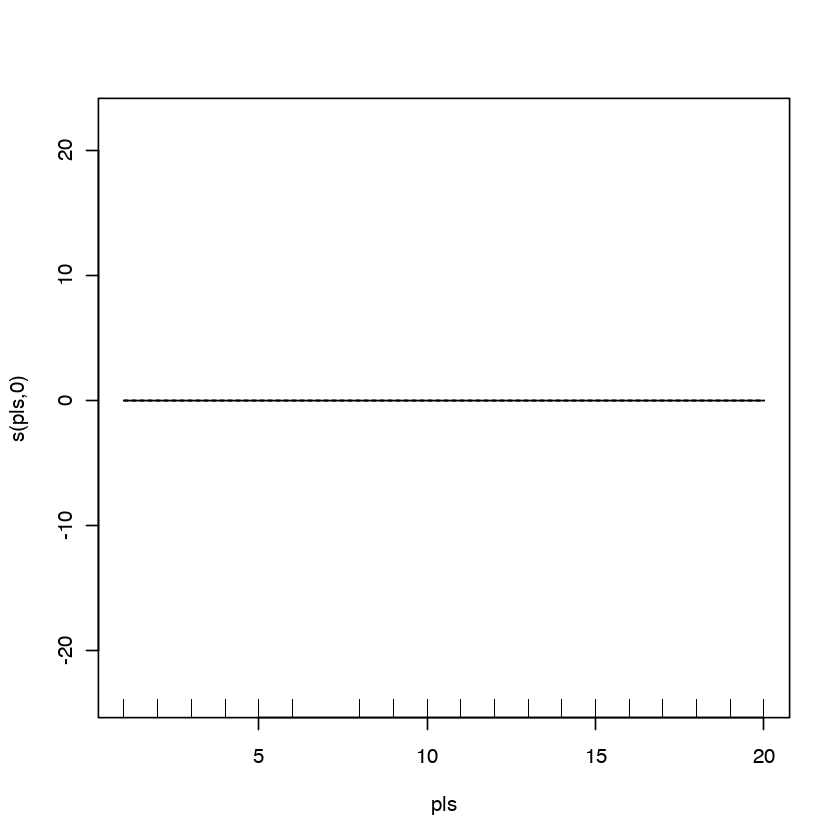

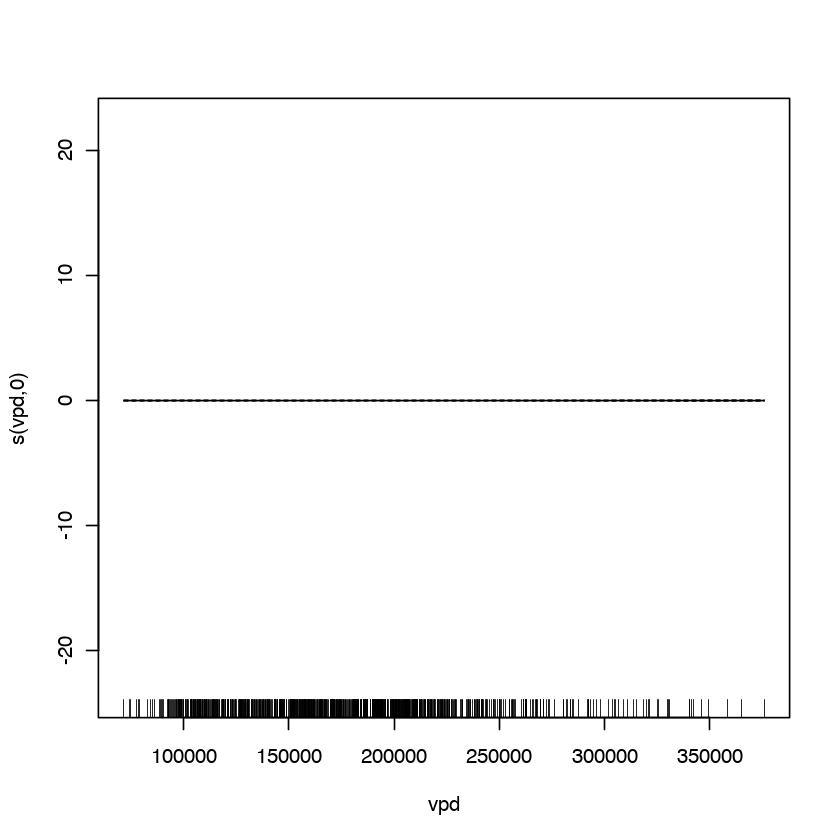

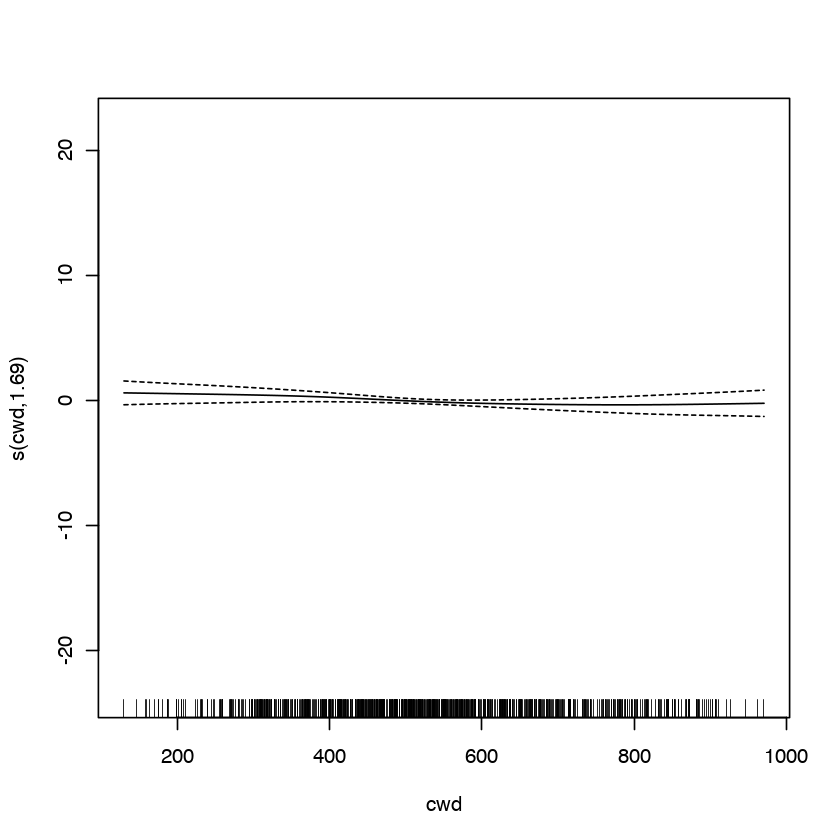

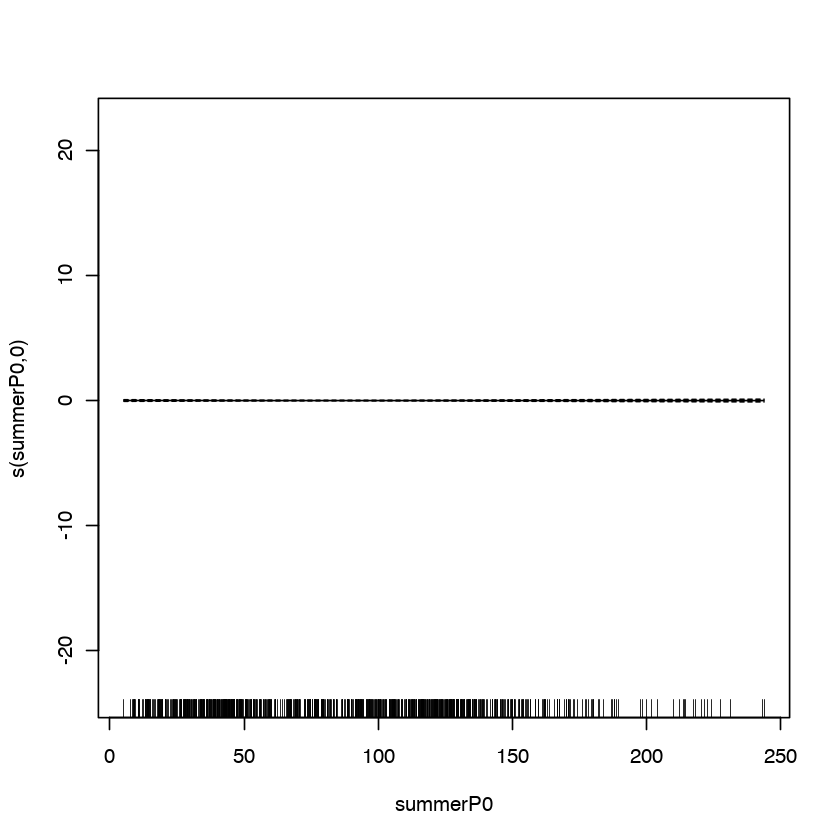

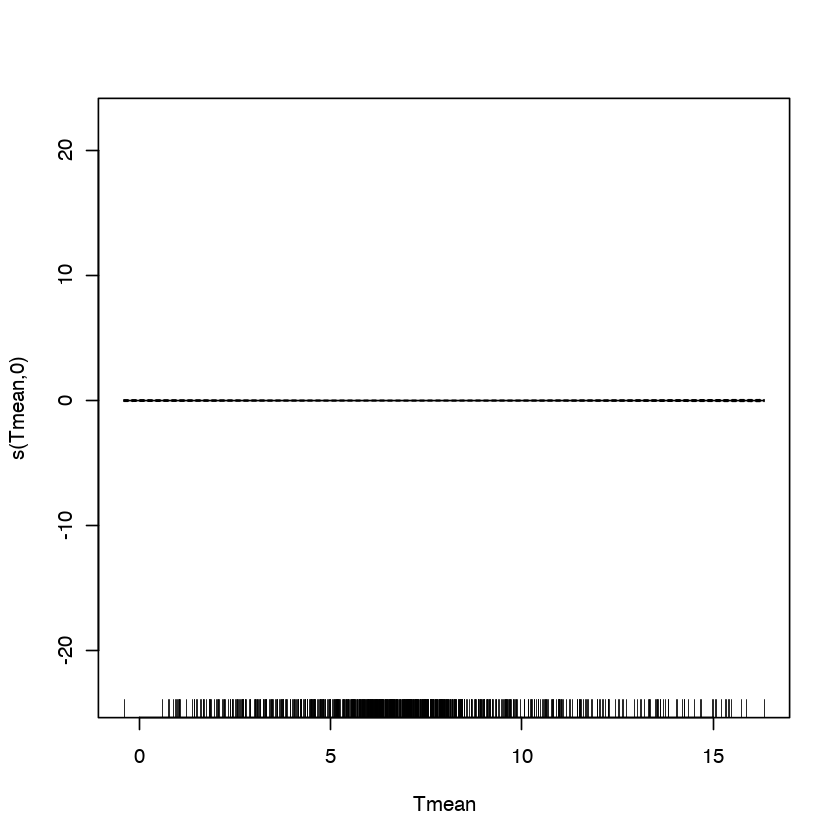

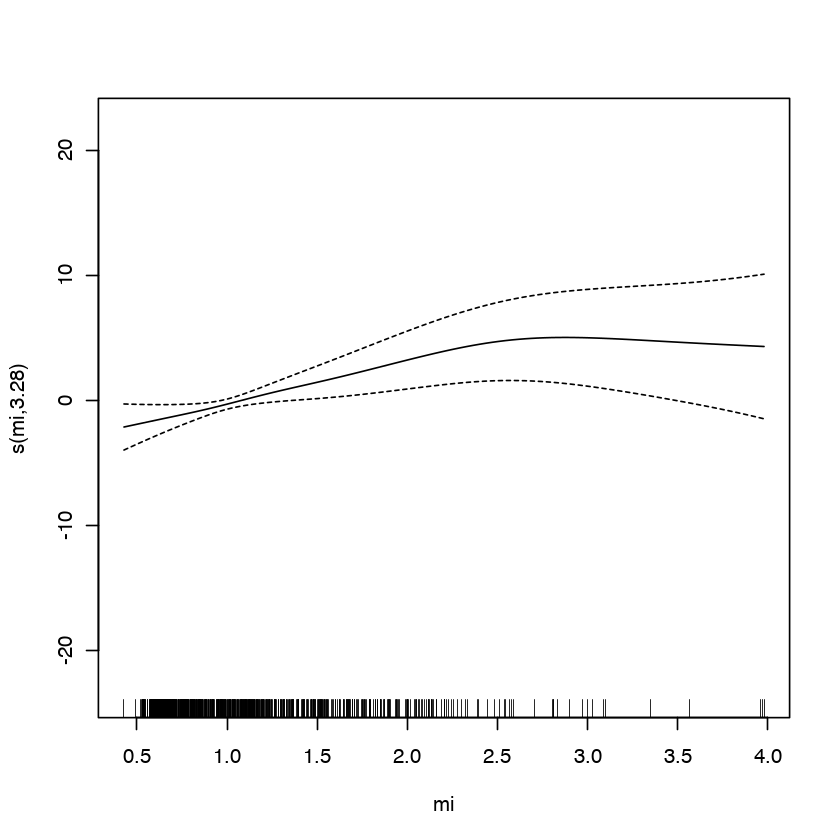

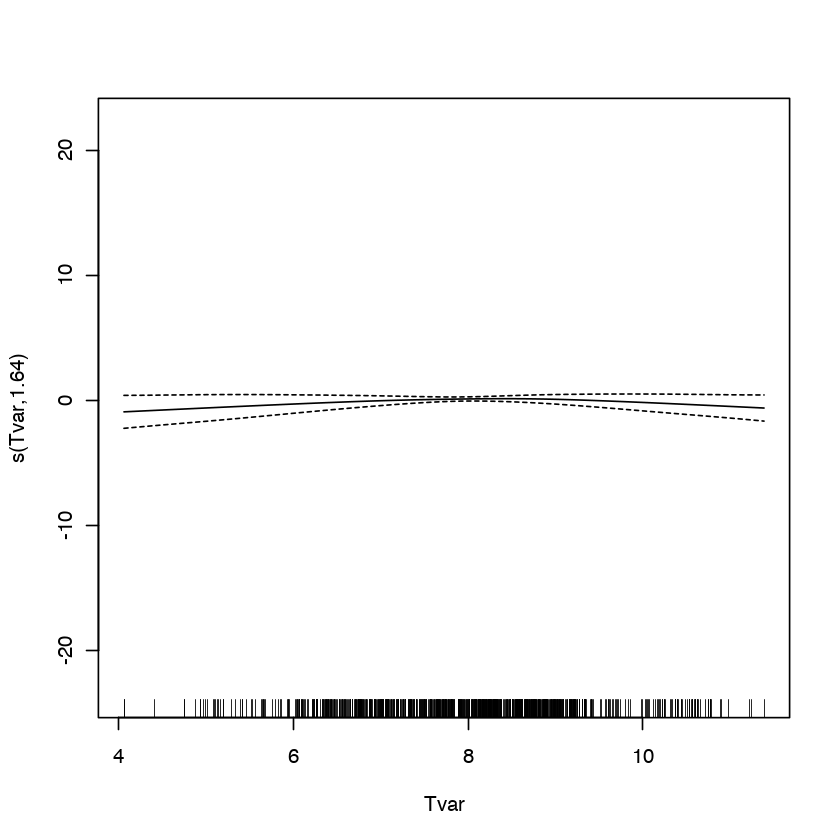

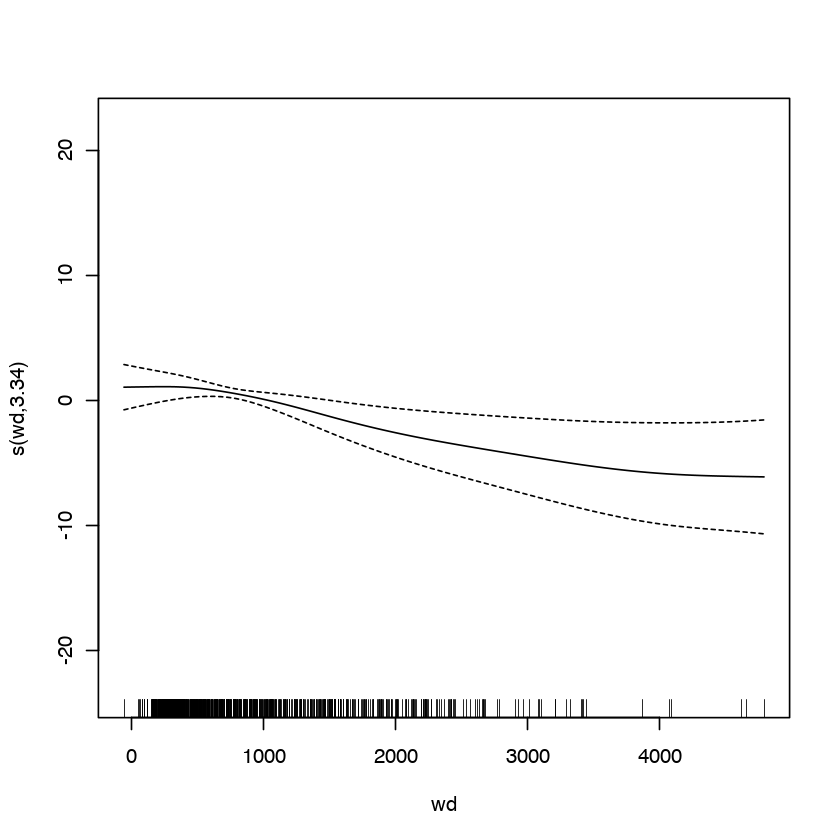

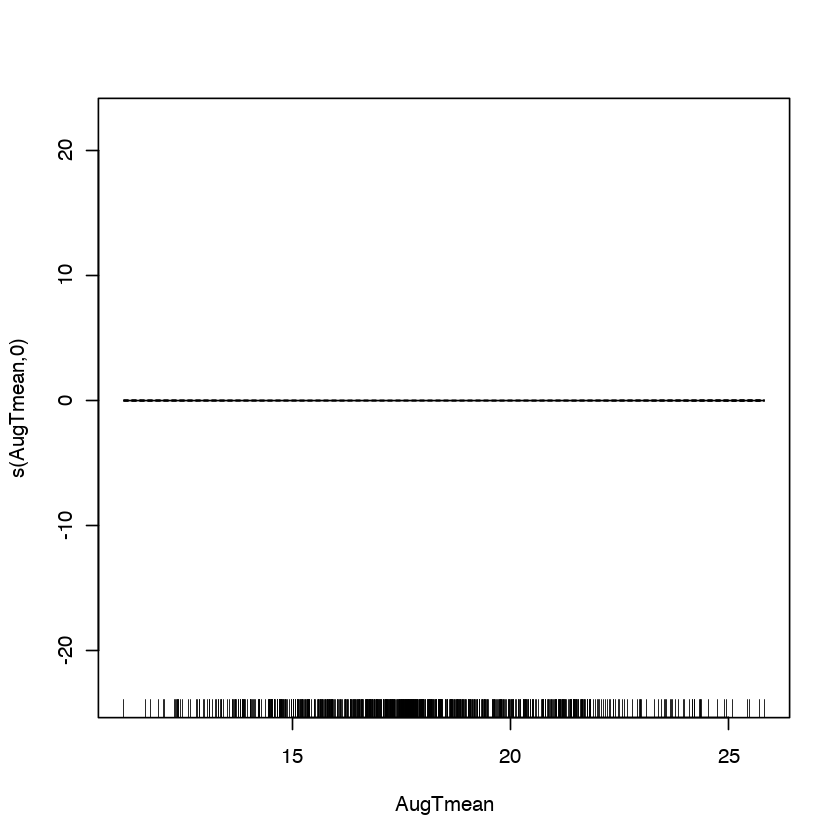

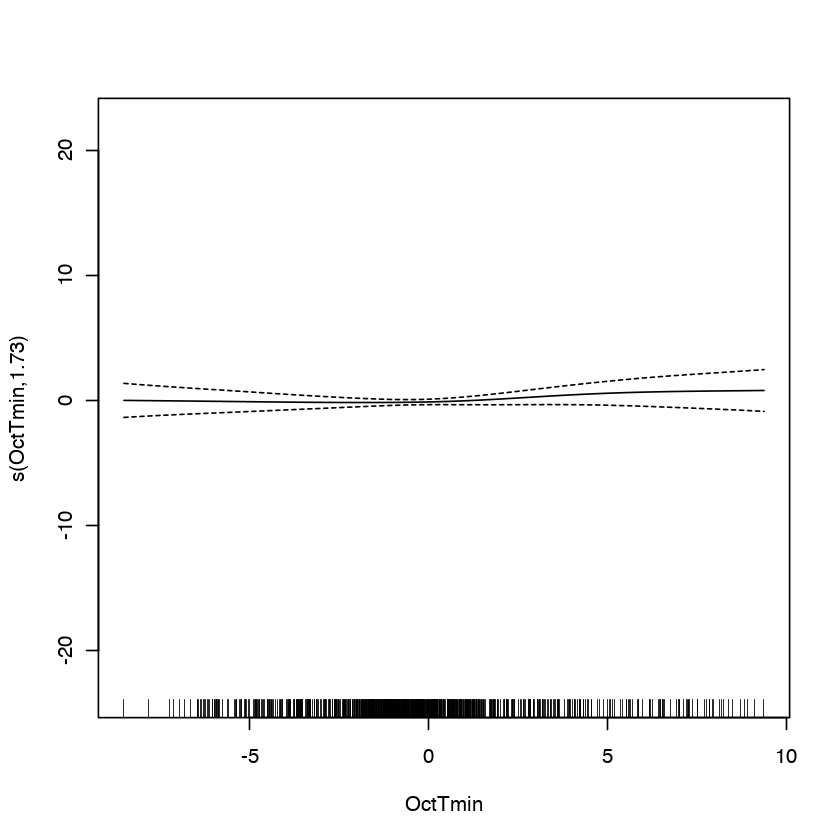

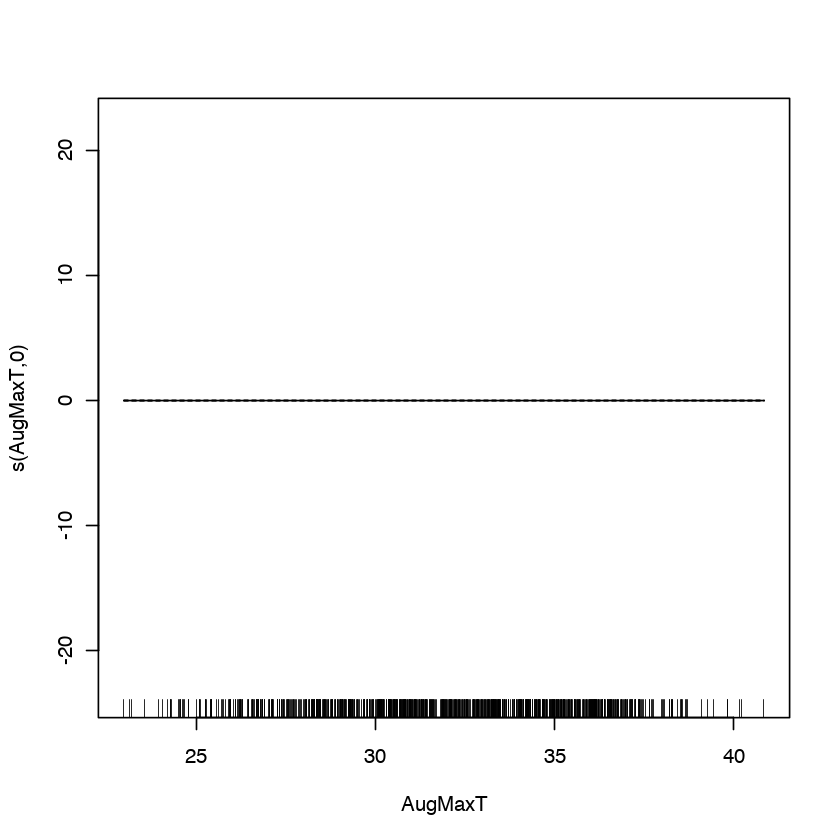

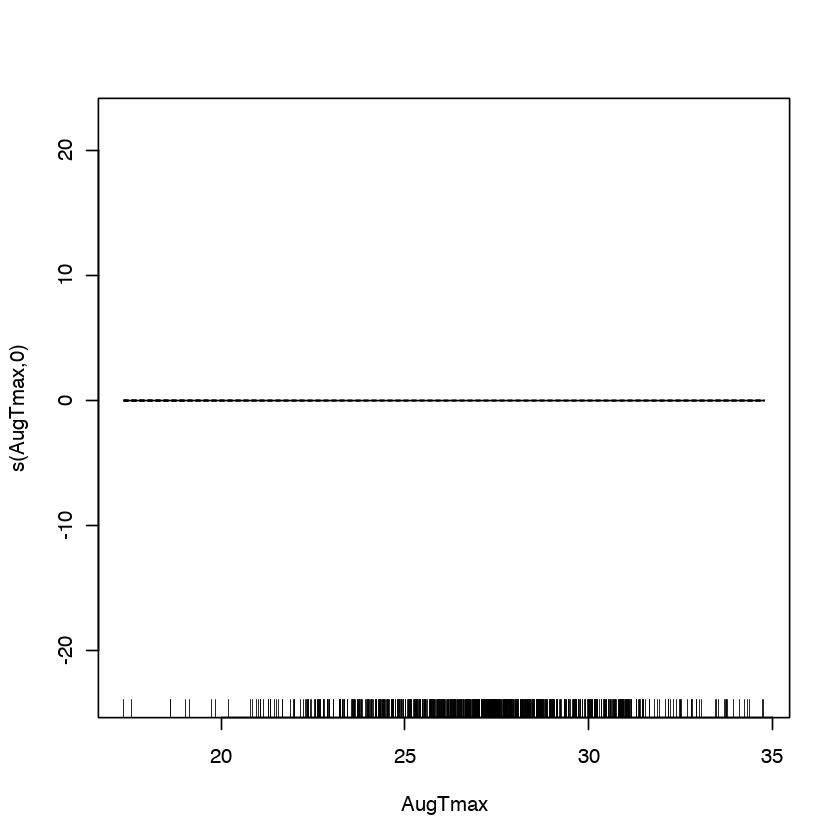

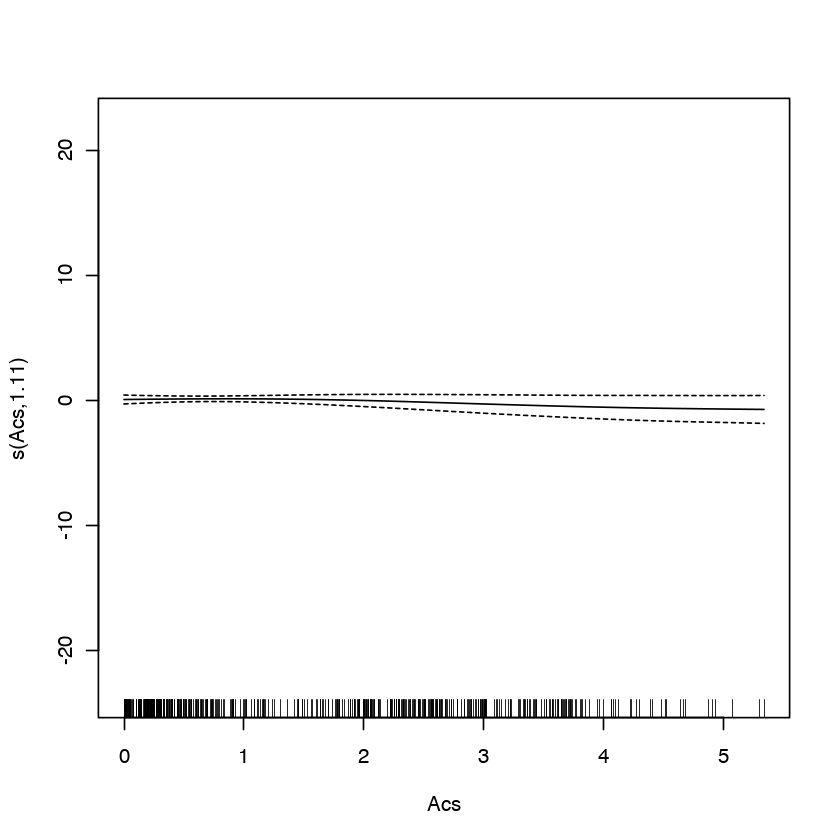

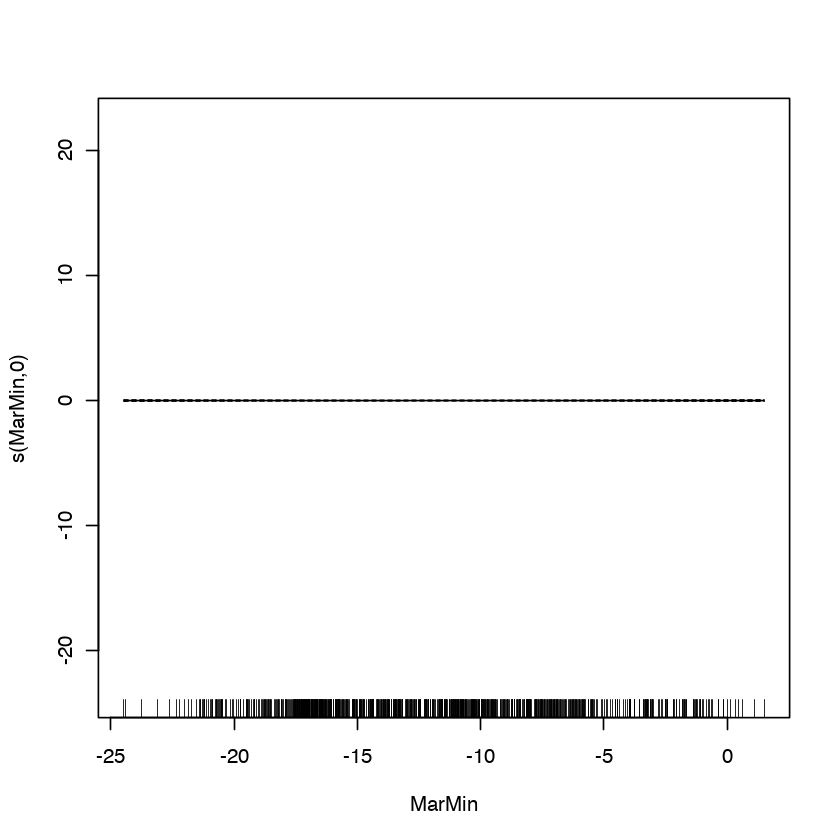

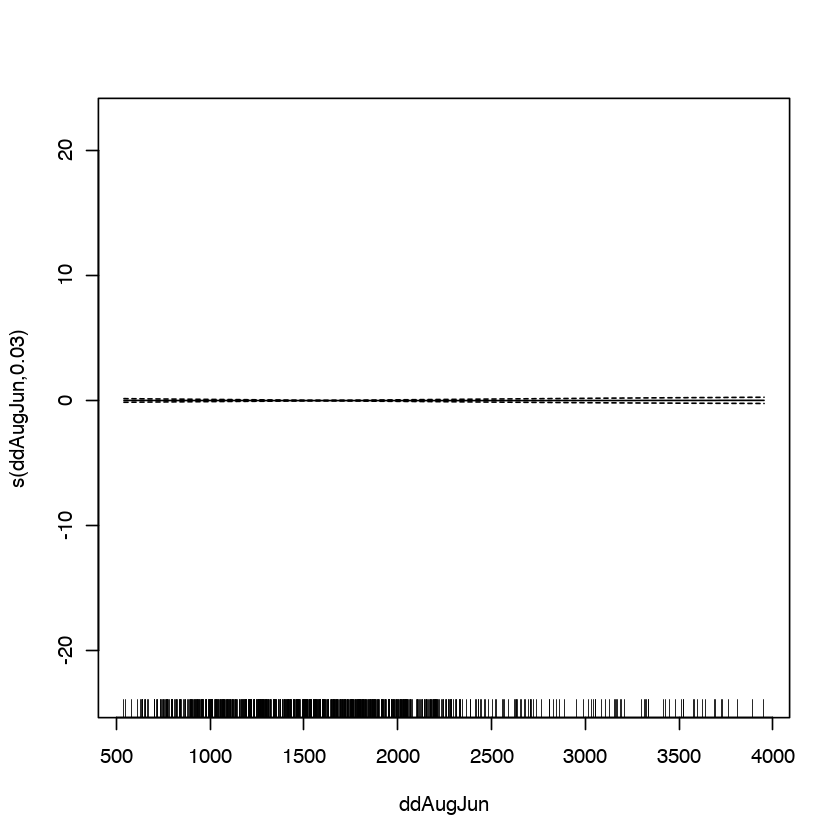

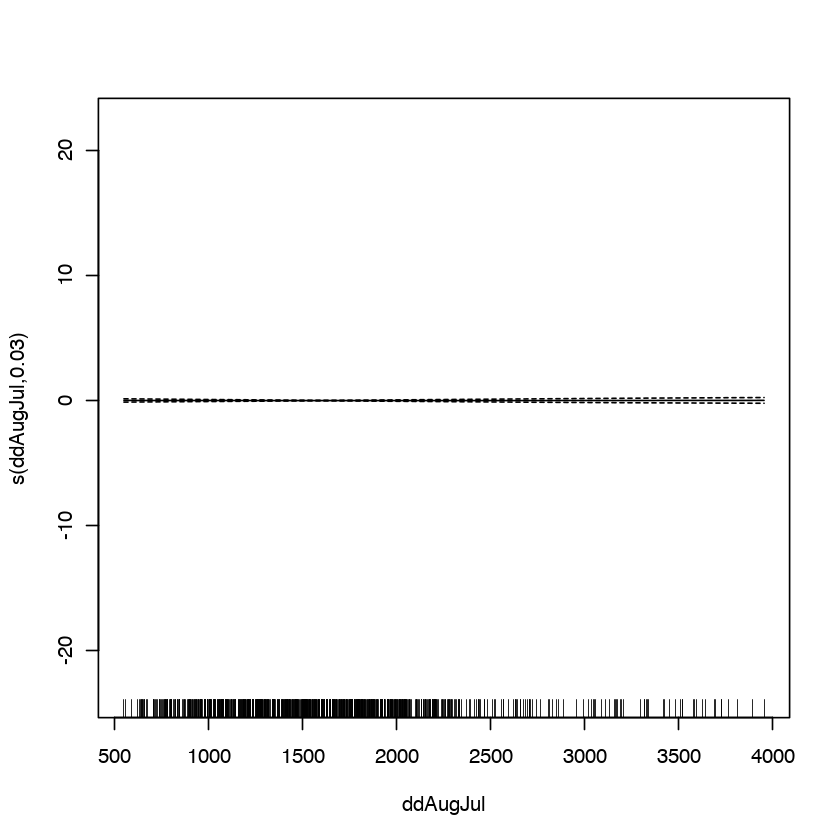

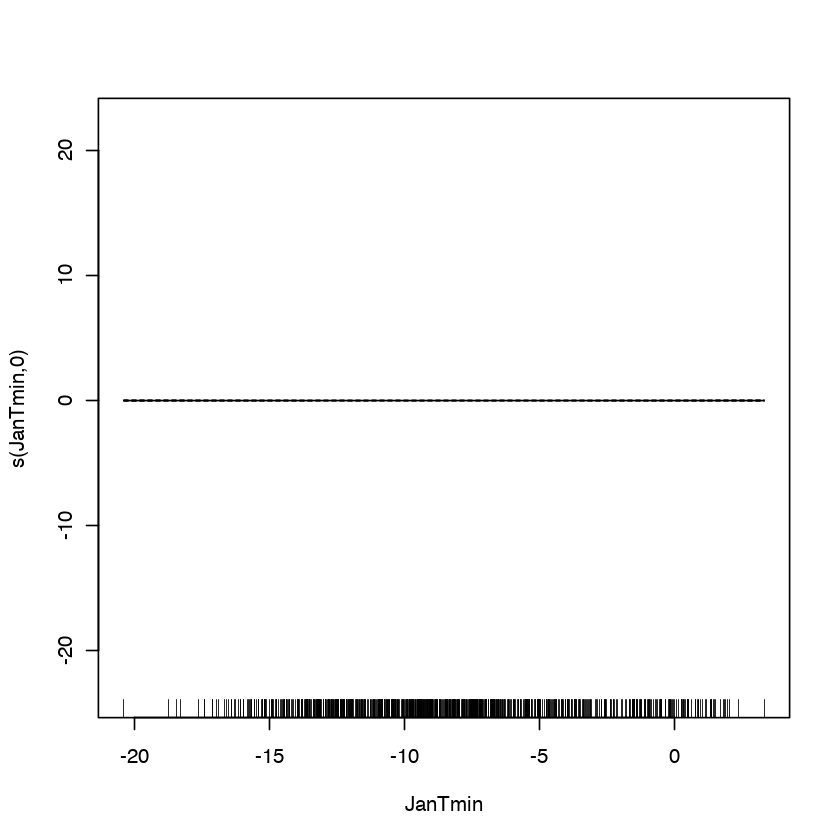

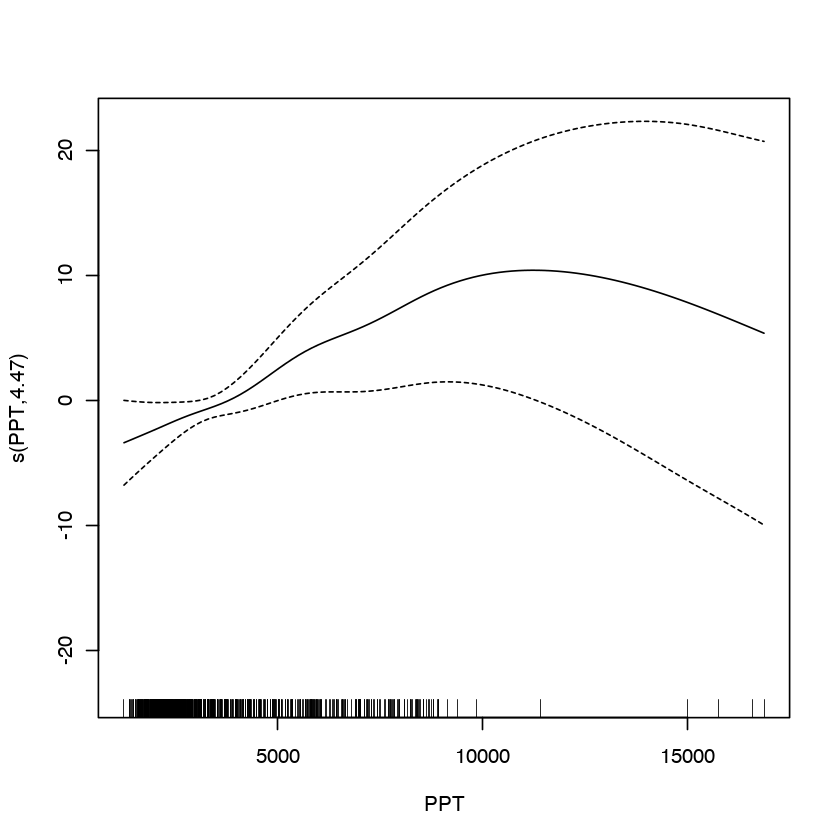

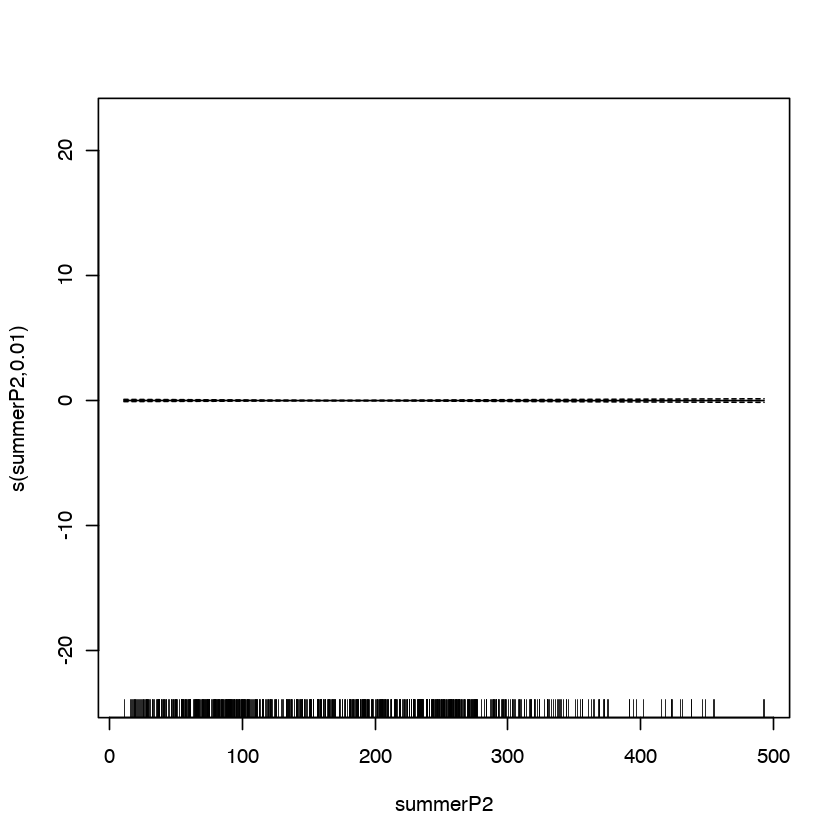

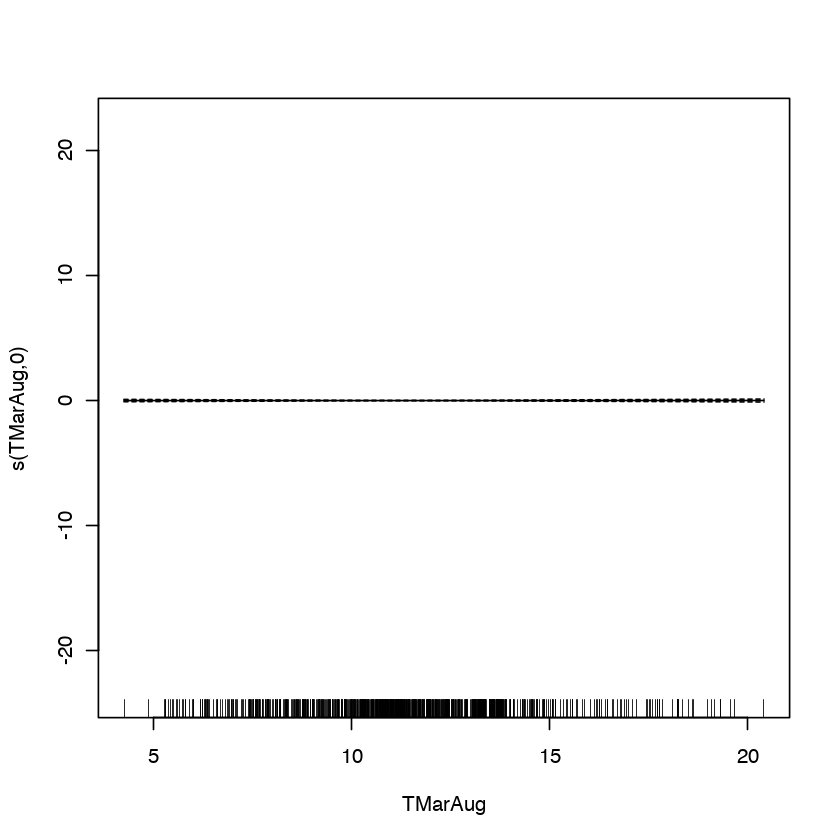

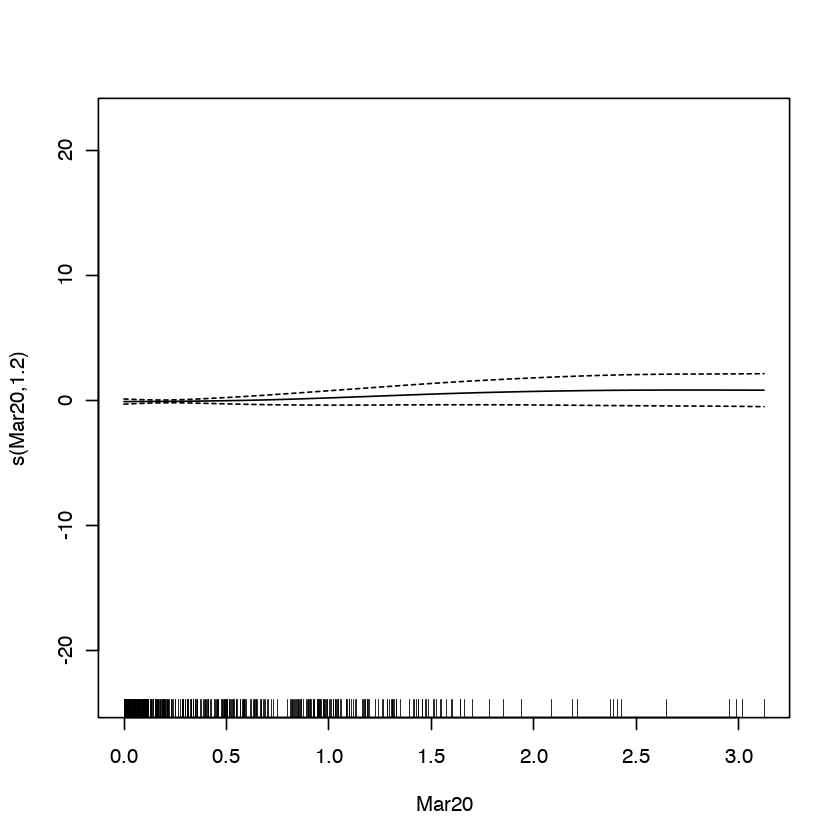

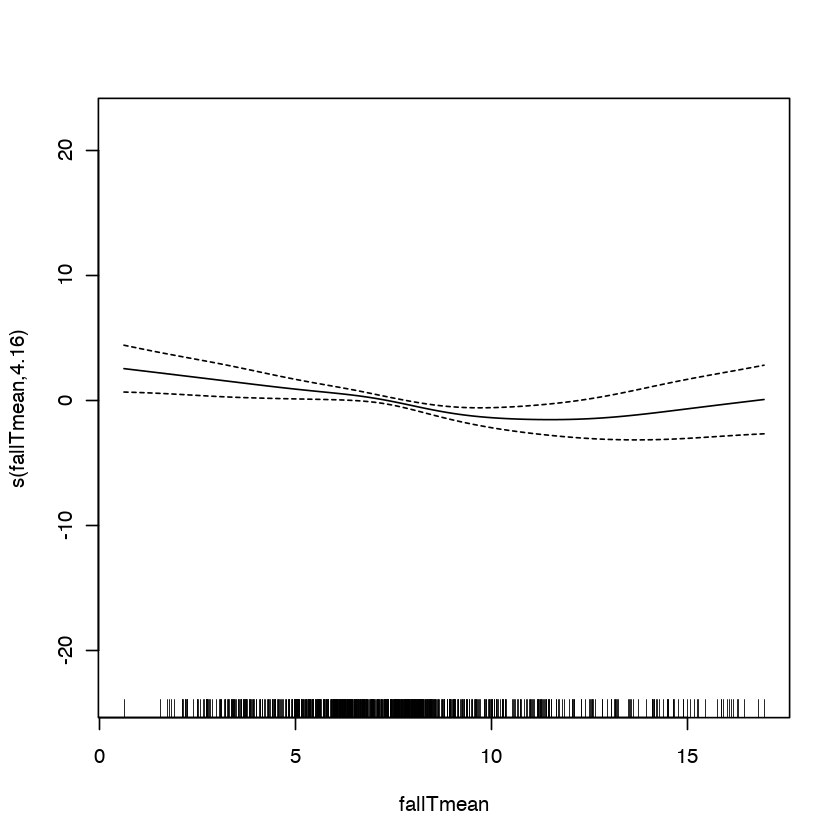

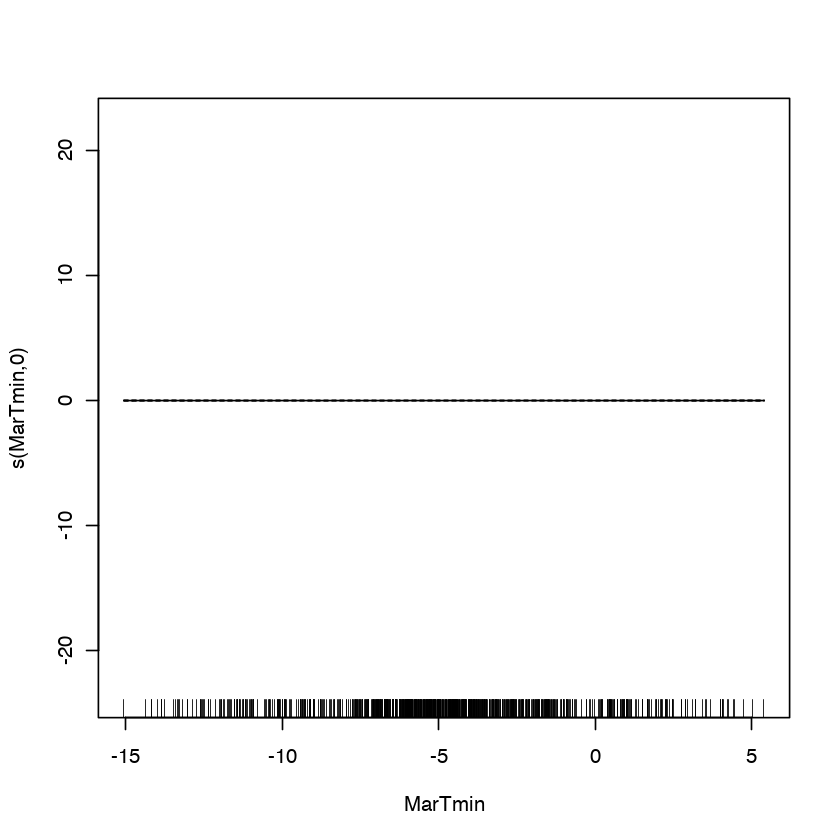

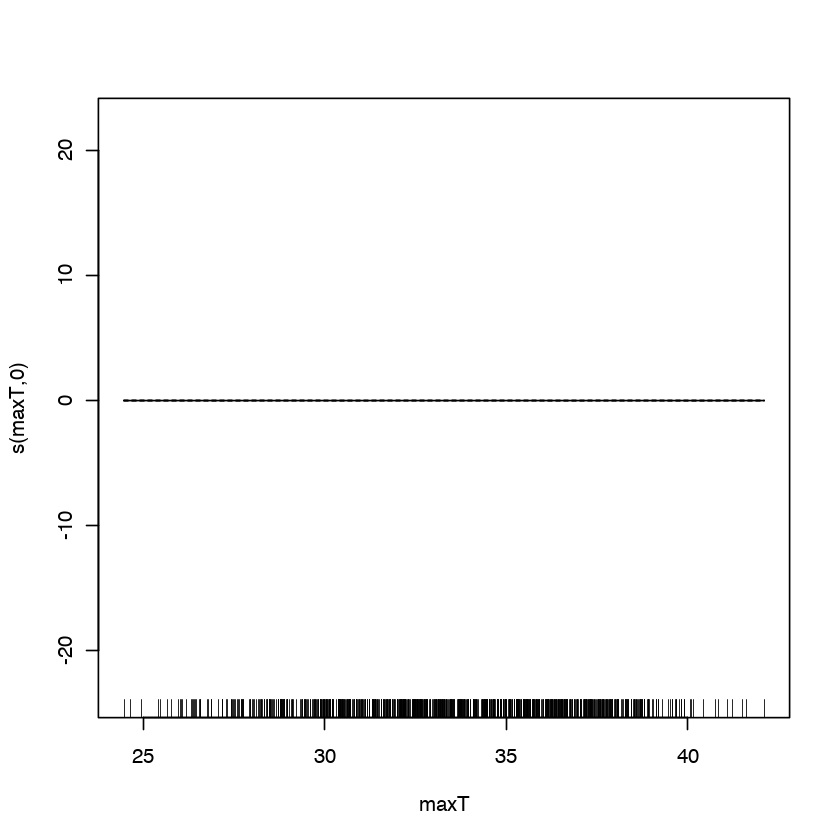

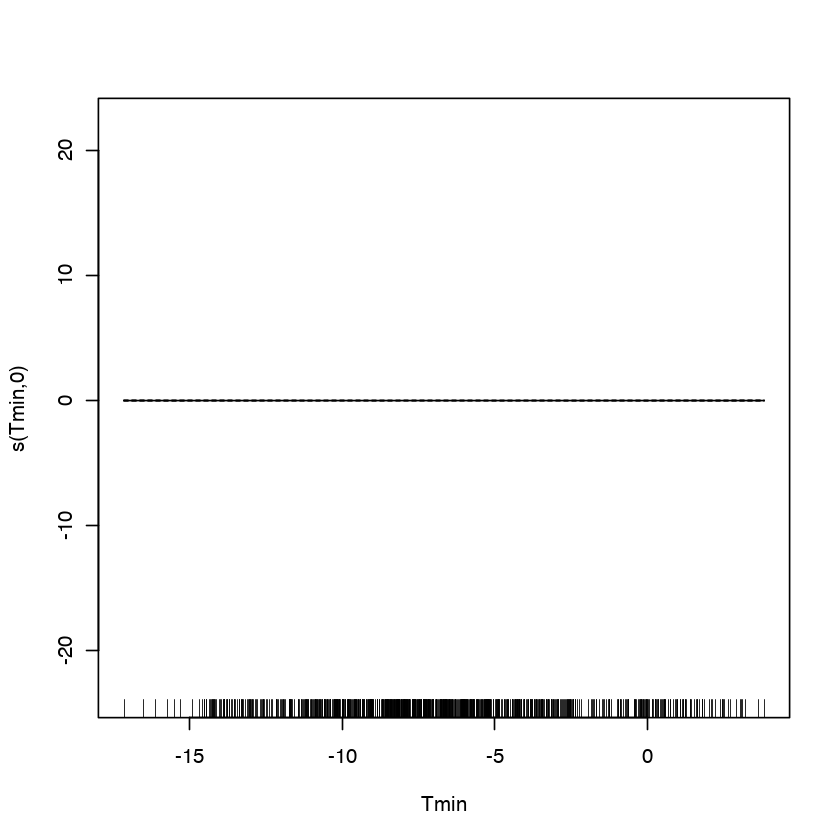

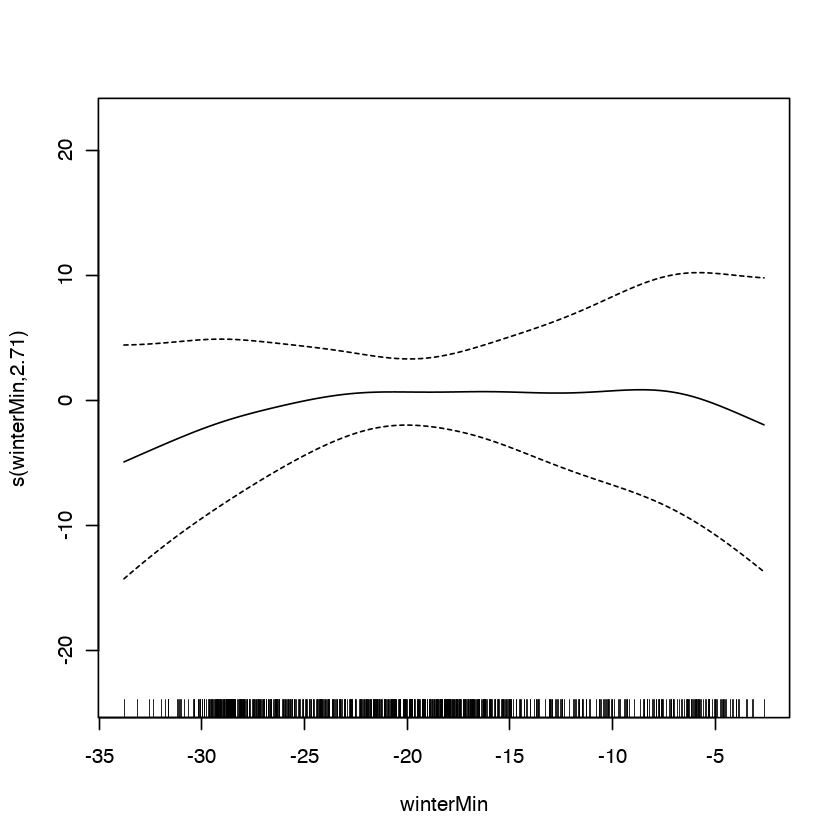

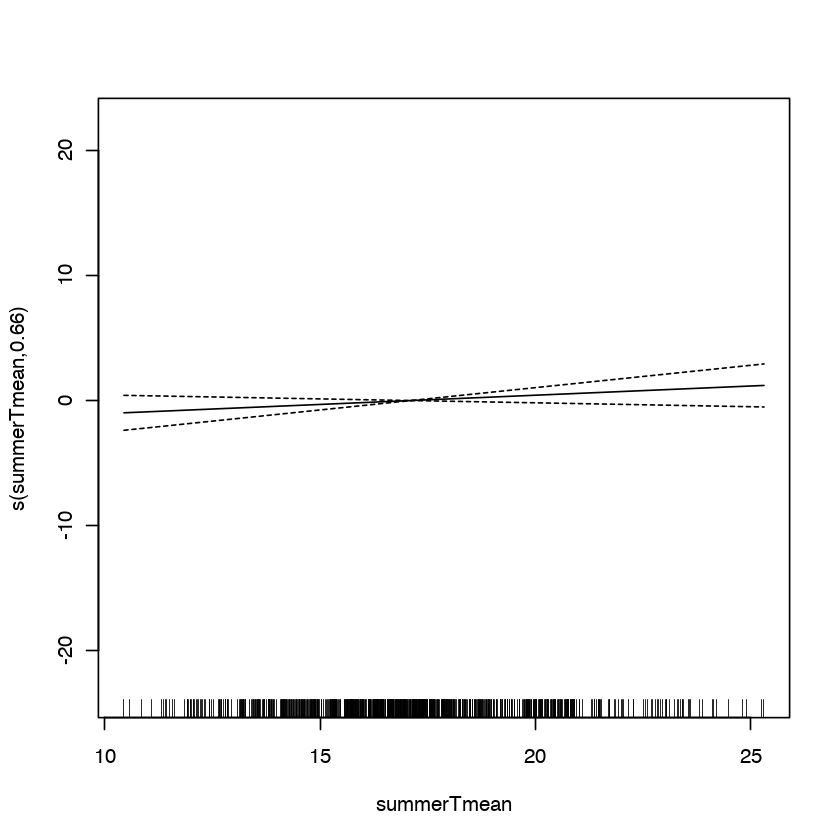

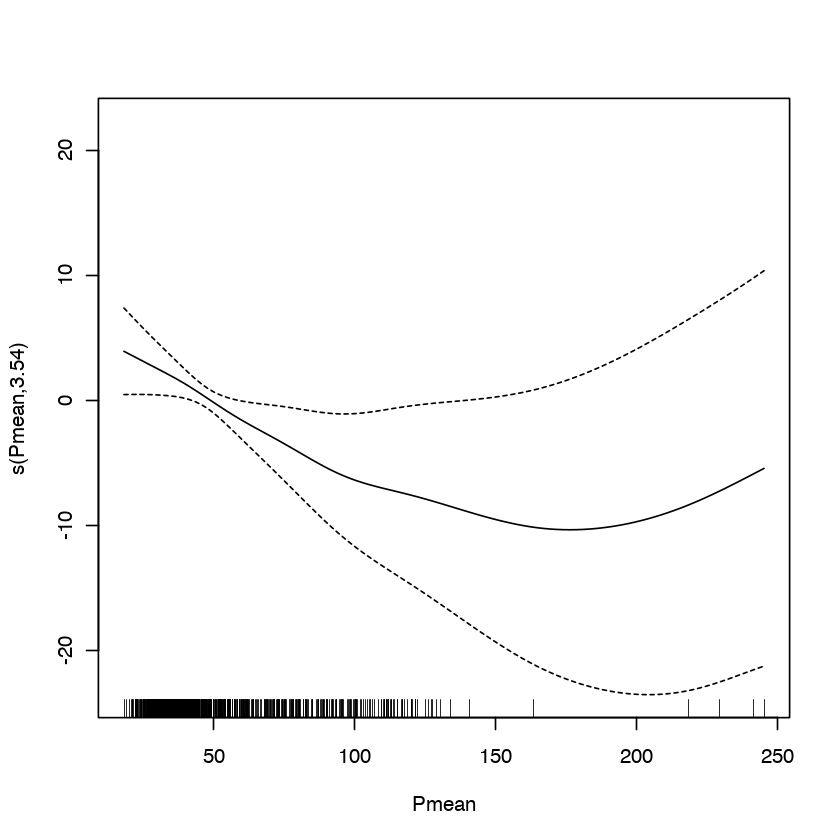

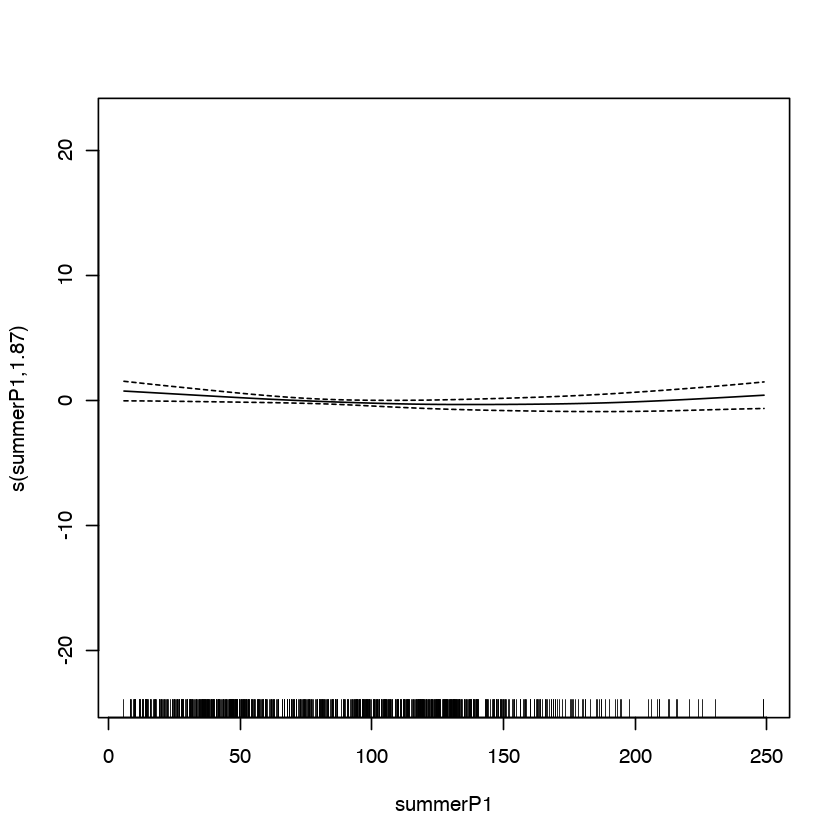

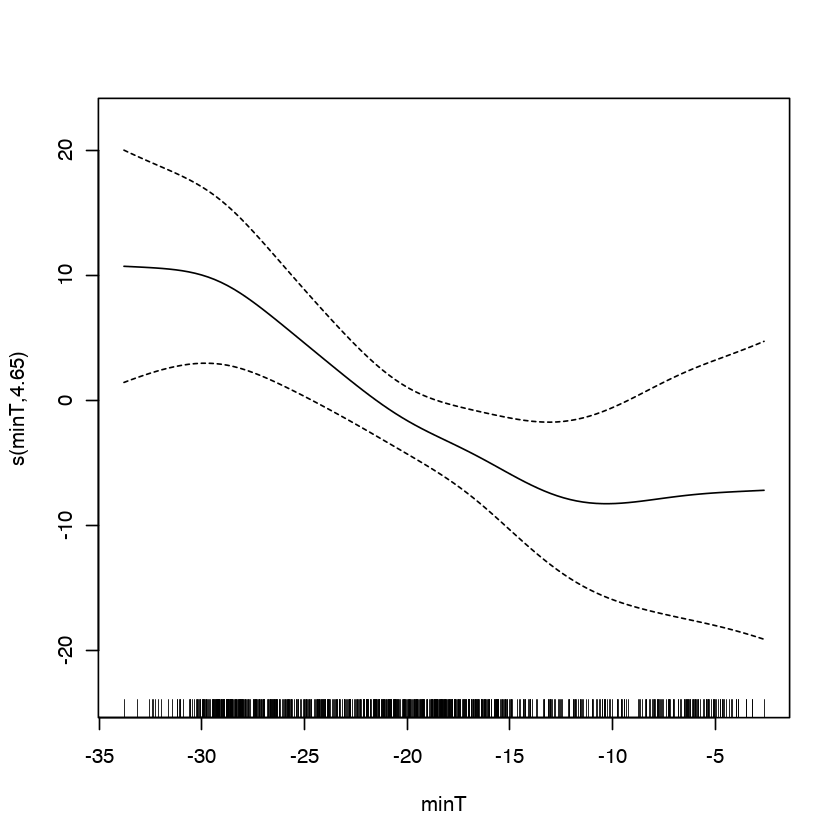

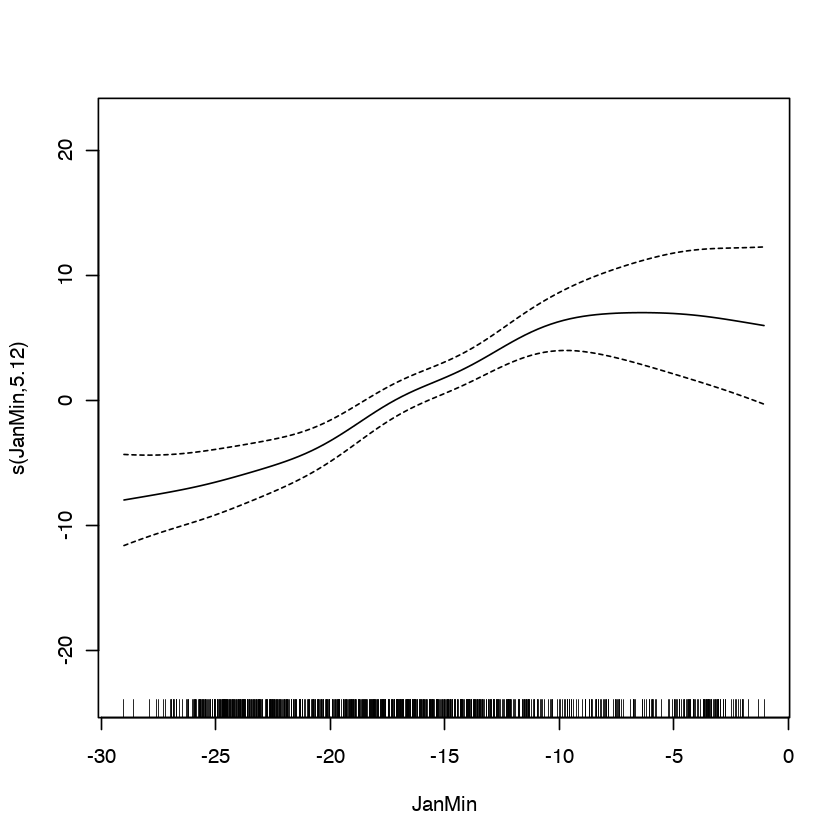

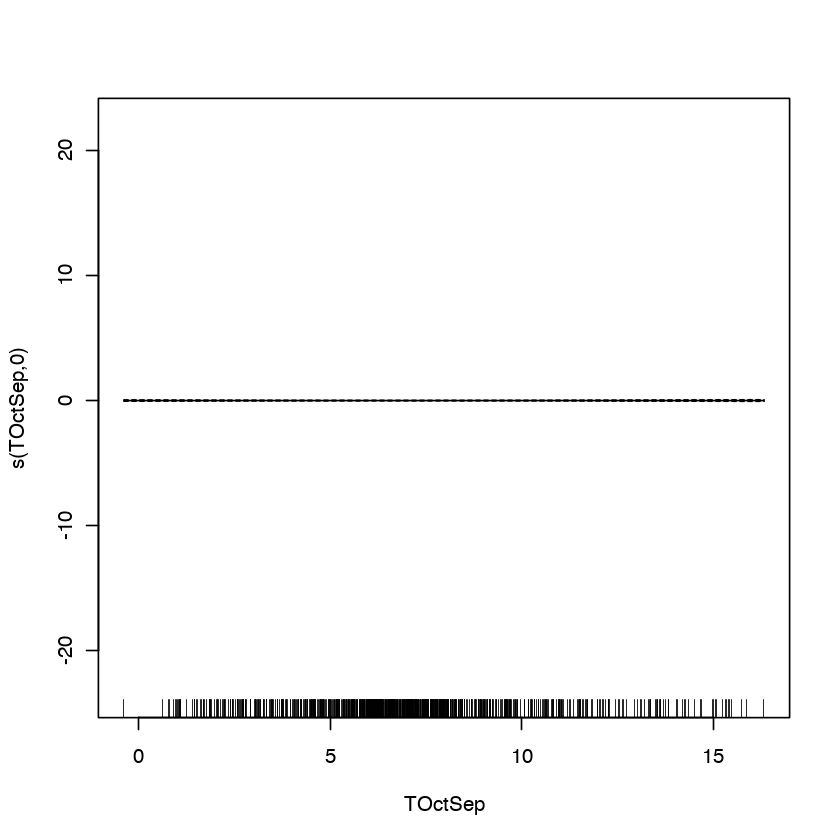

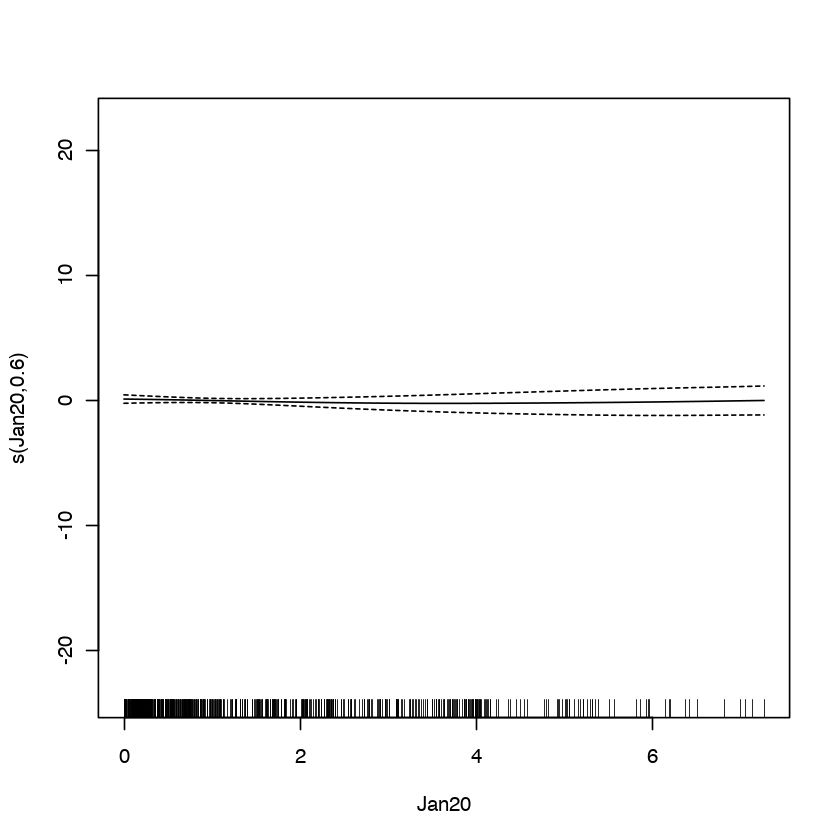

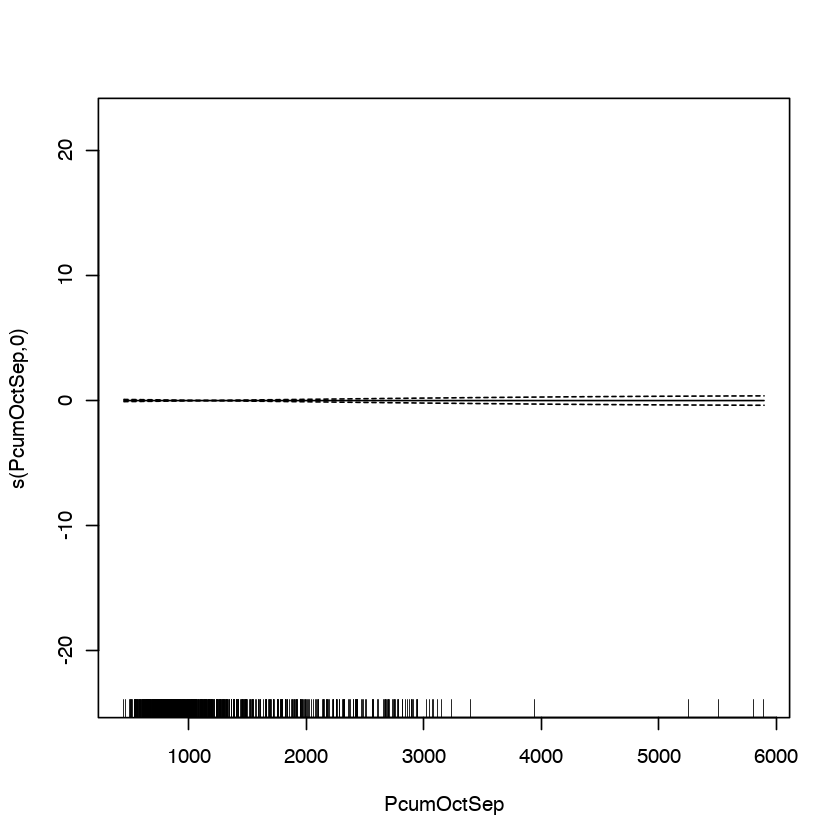

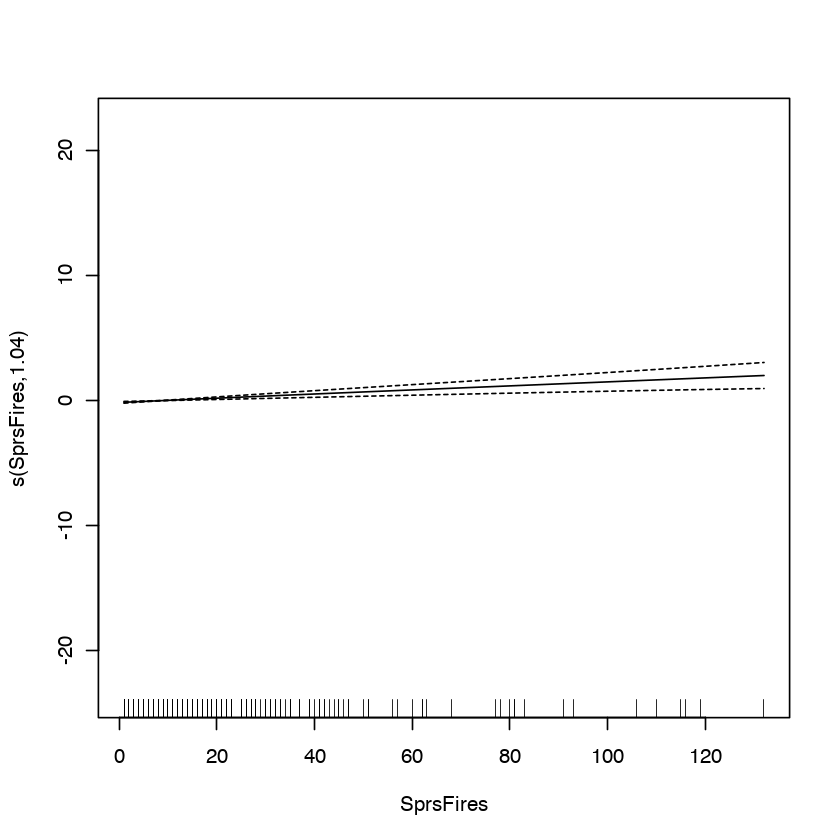

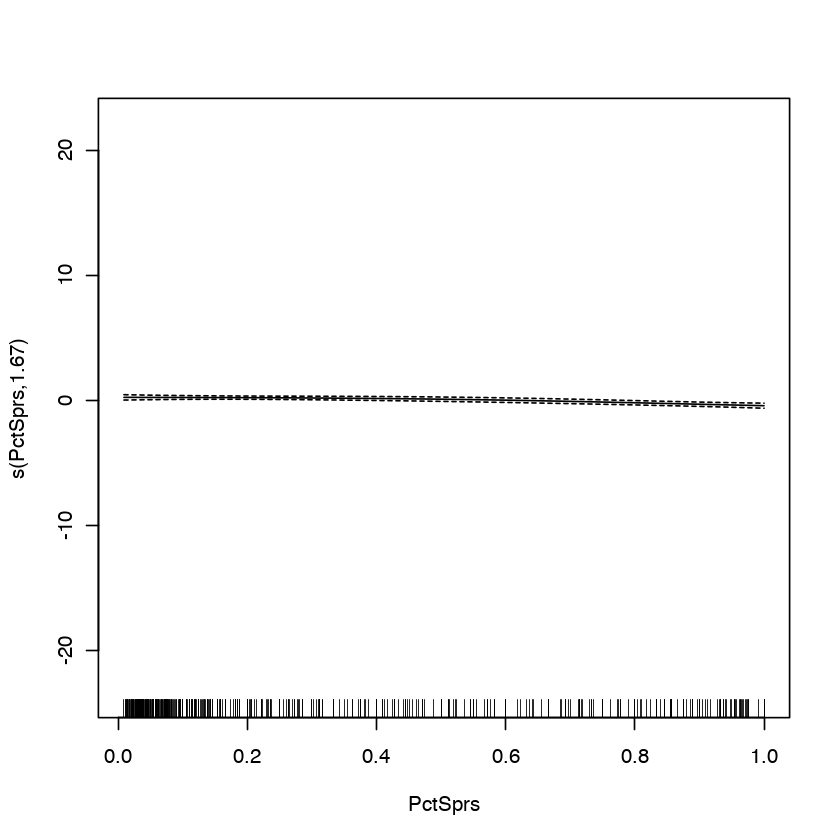

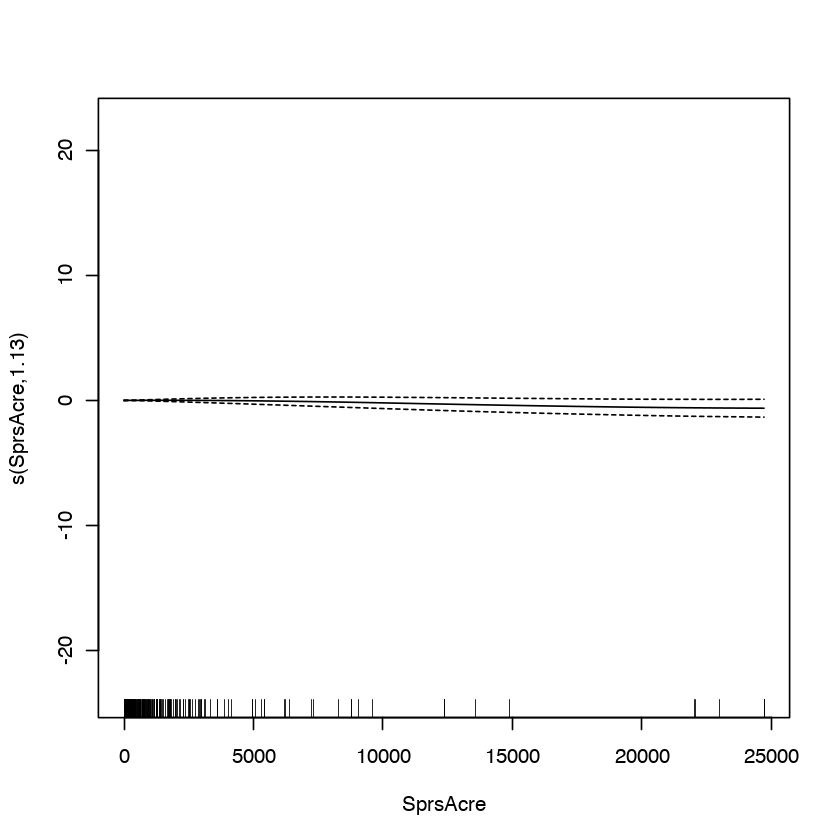

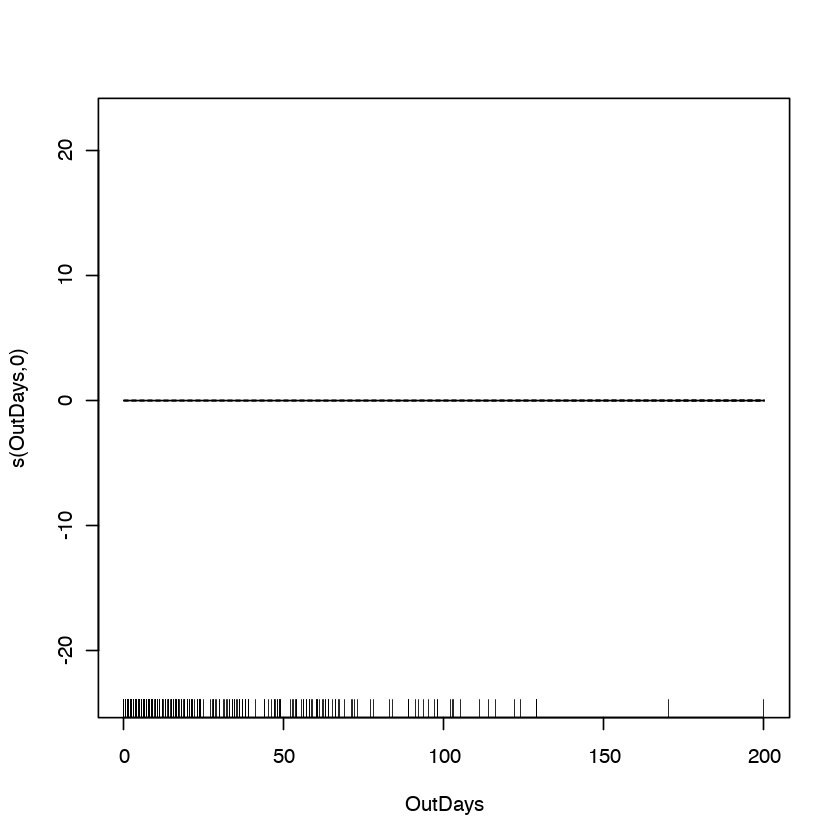

In [18]:
plot(mod)